<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

## Importing necessary libraries

In [129]:
# to suppress unnecessary warnings
import warnings
import tensorflow as tf
import os

warnings.filterwarnings("ignore")  # Suppress all warnings

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages are logged (default behavior), 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed

# Suppress TensorFlow logging warnings by setting the logging level
tf.get_logger().setLevel('ERROR')

In [130]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report, ConfusionMatrixDisplay

#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

In [131]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [132]:
# Reading the dataset.
df = pd.read_csv('bank-1.csv')

## Data Overview

In [133]:
# Let's view the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [134]:
# Let's view the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [135]:
# Checking the number of rows and columns in the data
df.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

In [136]:
# Let's check the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

In [137]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

In [138]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [139]:
df["Exited"].value_counts(1).round(2)

0    0.8
1    0.2
Name: Exited, dtype: float64

In [140]:
# Let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


statistical summary observations:

- **CreditScore** ranges from 350 to 850, with 50% of customers scoring between 584 and 718, indicating a diverse mix of creditworthiness.
- **Balance** has a wide distribution, with at least 50% of customers having a balance of zero, suggesting that a significant proportion of customers might not actively maintain deposits.
- **Age** shows that 50% of the customers are between 32 and 44 years old, with a maximum age of 92, indicating a customer base skewed toward middle-aged individuals.

In [141]:
# checks for the unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- **RowNumber** and **CustomerId** are unique identifiers for each customer, making them irrelevant for prediction and suitable for removal from the model.  
- **Geography** and **Gender** have only 3 and 2 unique categories, respectively, and can be efficiently handled using OneHotEncoding for categorical data preprocessing.

In [142]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(1).round(3))
    print("*" * 50)

Unique values in Surname are :
Smith       0.003
Scott       0.003
Martin      0.003
Walker      0.003
Brown       0.003
            ...  
Izmailov    0.000
Bold        0.000
Bonham      0.000
Poninski    0.000
Burbidge    0.000
Name: Surname, Length: 2932, dtype: float64
**************************************************
Unique values in Geography are :
France     0.501
Germany    0.251
Spain      0.248
Name: Geography, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.546
Female    0.454
Name: Gender, dtype: float64
**************************************************


- The **Surname** column has 2932 unique values, with the most frequent surnames (e.g., Smith, Scott) accounting for only ~0.3% each. This column likely adds little value to the model and can be dropped.  
- The **Geography** column shows a fairly balanced distribution, with 50% of customers from France, 25% from Germany, and 25% from Spain, making it suitable for OneHotEncoding.  
- The **Gender** column is slightly skewed, with ~54.6% of customers being male and ~45.4% female.

## Exploratory Data Analysis

In [143]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [144]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [145]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [146]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Gender

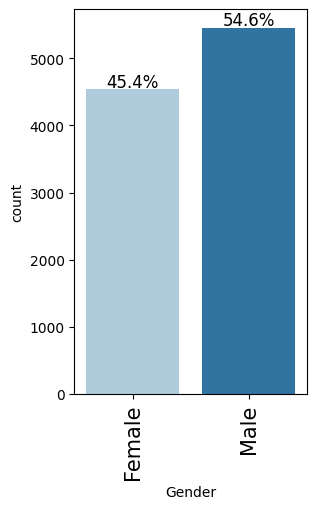

In [147]:
# labeled barplot on gender
labeled_barplot(df, "Gender",perc=True)

- The dataset has a slight gender imbalance, with 54.6% of the customers being male and 45.4% female. While not extreme, this skew could subtly influence model predictions if gender is a key feature.  
- This distribution indicates that the dataset captures a relatively balanced representation of genders, making it less likely to introduce strong bias in gender-specific predictions.

#### Tenure

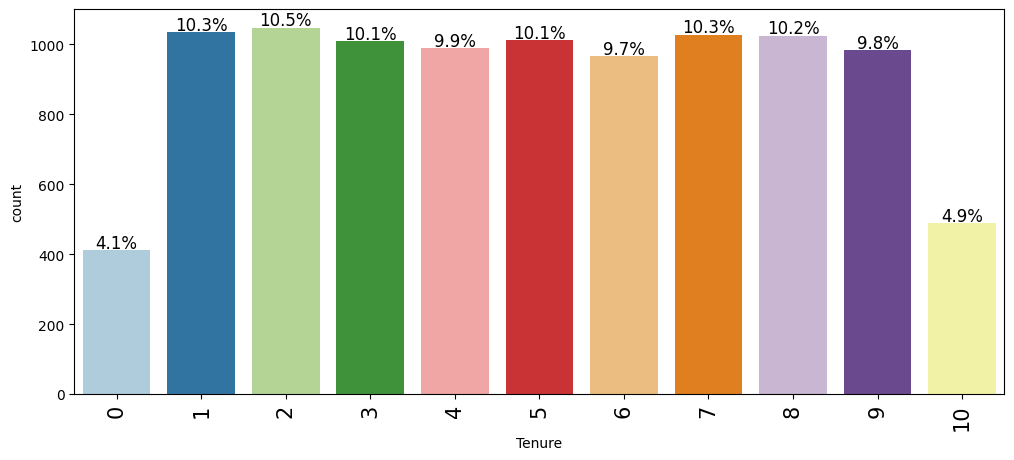

In [148]:
labeled_barplot(df, "Tenure",perc=True)

- The tenure distribution is relatively uniform between 1 and 9 years, with each category contributing approximately 10% of the dataset, indicating a well-represented range of customer tenures.  
- Tenure values of 0 and 10 years are underrepresented, accounting for only 4.1% and 4.9% of the customers, respectively, which may suggest fewer new customers and fewer extremely long-term customers in the dataset.  

#### Has Credit Card?

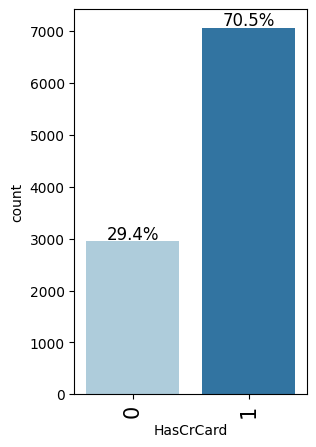

In [149]:
labeled_barplot(df, "HasCrCard",perc=True)

- The majority of customers, 70.5%, have a credit card, suggesting that most individuals in the dataset utilize credit services offered by the bank.  
- A significant minority, 29.4%, do not have a credit card, which may represent a segment of customers who either prefer alternative payment methods or have limited access to credit. This difference could influence their overall banking behavior and retention.

- The tenure distribution is fairly uniform between 1 and 9 years, with each category representing around 10% of the dataset, indicating a balanced representation of customer tenures.  
- Tenure values of 0 and 10 years are noticeably underrepresented, accounting for only 4.1% and 4.9% respectively, which may suggest fewer new customers and fewer long-term customers in the dataset.

#### Exited

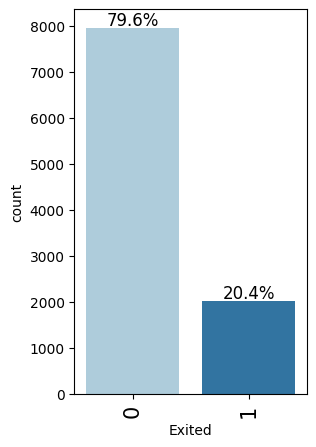

In [150]:
labeled_barplot(df,"Exited",perc=True)

- This bar chart indicates an imbalanced distribution of the target variable, with 79.6% of customers not exiting (class 0) and only 20.4% exiting (class 1).  
- The imbalance suggests that this is a classic case of an imbalanced classification.  

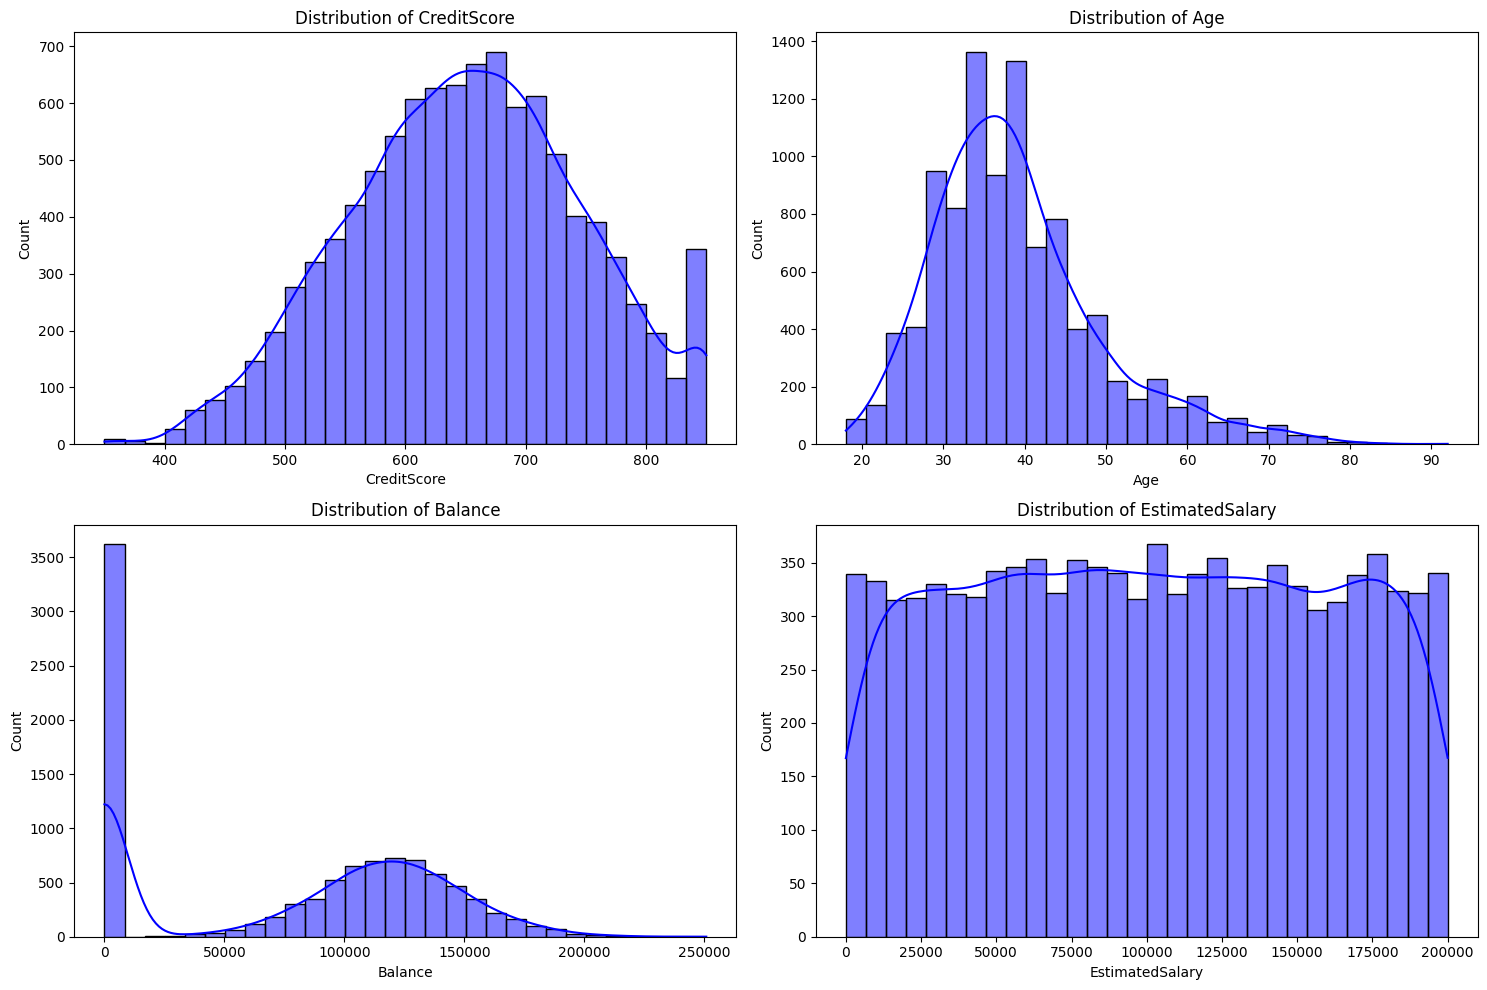

In [151]:
# Univariate Analysis
plt.figure(figsize=(15, 10))
for i, column in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


- **CreditScore** and **Age** exhibit fairly normal distributions, with most customers having a CreditScore between 600-750 and an age range concentrated around 30-50, reflecting a typical middle-aged customer base.  
- **Balance** is highly skewed, with a significant number of customers having zero balance, while others are distributed between approximately 50,000 and 200,000, indicating diverse banking habits.  
- **EstimatedSalary** is uniformly distributed across the range, suggesting that income does not have a strong bias or concentration in this dataset.

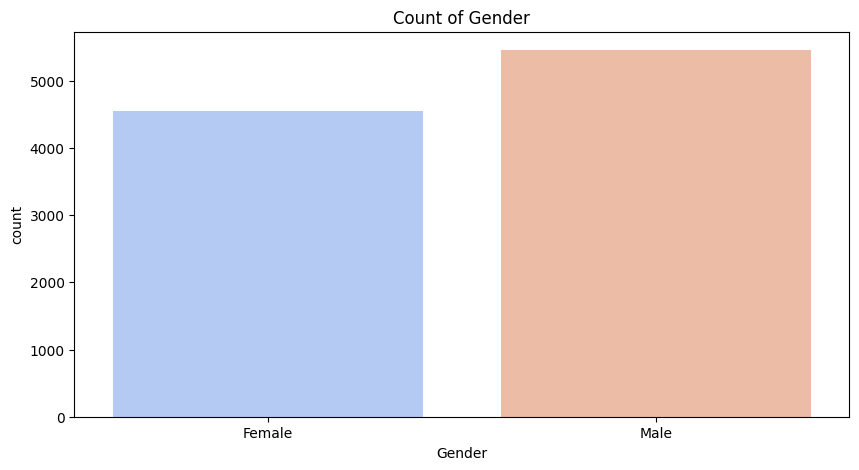

In [154]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Count of Gender')
plt.show()

- The gender distribution in the dataset is fairly balanced, with a slightly higher count for males (class 1) compared to females (class 0). This indicates that the dataset does not have a significant gender bias.  
- This balance in gender representation ensures that the model's predictions are less likely to be skewed based on gender. However, it's important to monitor if gender disproportionately influences the target variable during analysis.

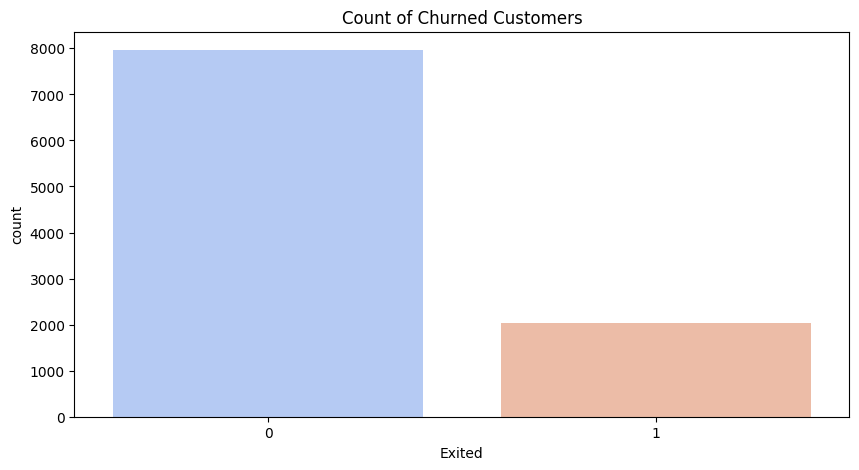

In [155]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title('Count of Churned Customers')
plt.show()

- The chart shows a significant class imbalance, with the majority of customers (approximately 80%) not churning (class 0) and only around 20% churning (class 1).  
- This imbalance highlights the need for techniques such as oversampling, undersampling, or class weights during model training to ensure that the model does not become biased toward predicting the majority class.

### Bivariate Analysis

#### Gender and Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


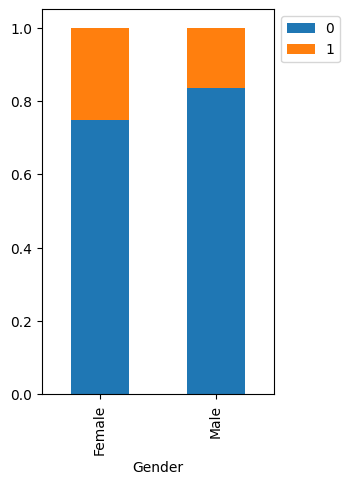

In [156]:
stacked_barplot(df, "Gender", "Exited")

# # Count plots for categorical variables against churn
# plt.figure(figsize=(10, 5))
# sns.countplot(x='Gender', hue='Exited', data=df, palette='coolwarm')
# plt.title('Gender vs Churn')
# plt.show()


- The chart shows that a higher proportion of females (class 0) have exited (orange segment) compared to males (class 1), indicating that gender may have an impact on customer churn.  
- While the difference is notable, further statistical analysis is needed to determine whether this disparity is significant or influenced by other correlated factors, such as balance or tenure.

#### Tenure and Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


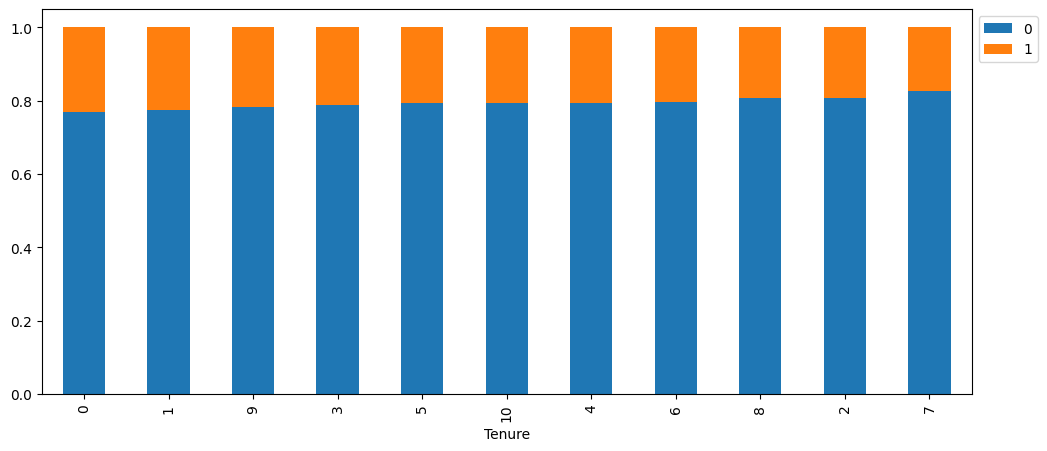

In [157]:
stacked_barplot(df, "Tenure", "Exited")

- The chart illustrates the relationship between **Tenure** and **Exited**. The proportion of customers who exited (orange) is relatively consistent across most tenure values, with no strong correlation between tenure length and churn rate.  
- However, customers with a **tenure of 0** have a slightly higher churn rate compared to other groups, suggesting that new customers may be more likely to leave early. This could indicate onboarding issues or unmet initial expectations.  
- Long-tenure customers (e.g., **tenure of 10**) appear to have a slightly lower churn rate, potentially reflecting higher loyalty among long-term customers.

#### # of Products vs. Exited
#### Has Credit Card vs. Exited
#### Active Membership vs. Exited

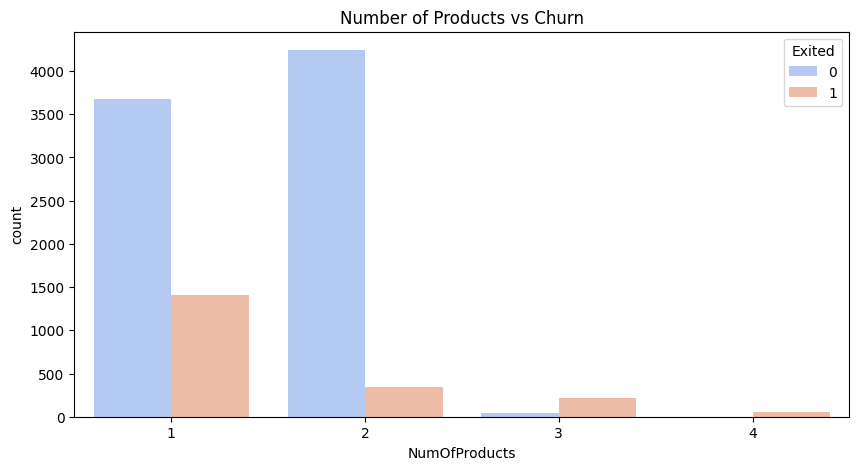

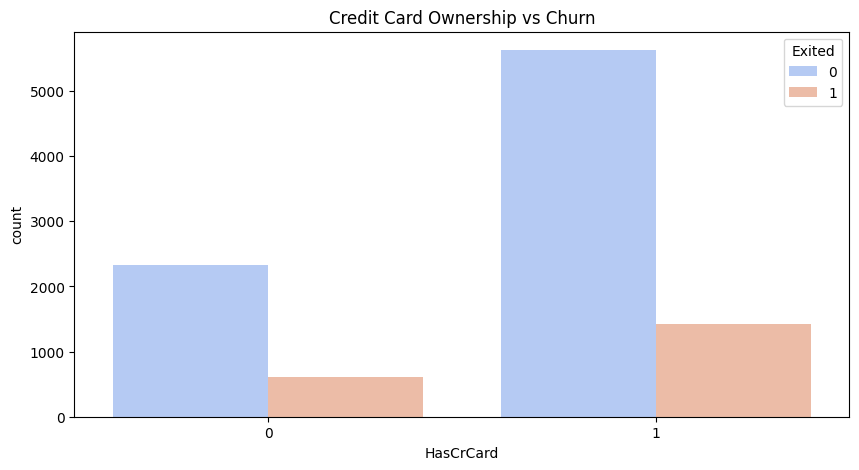

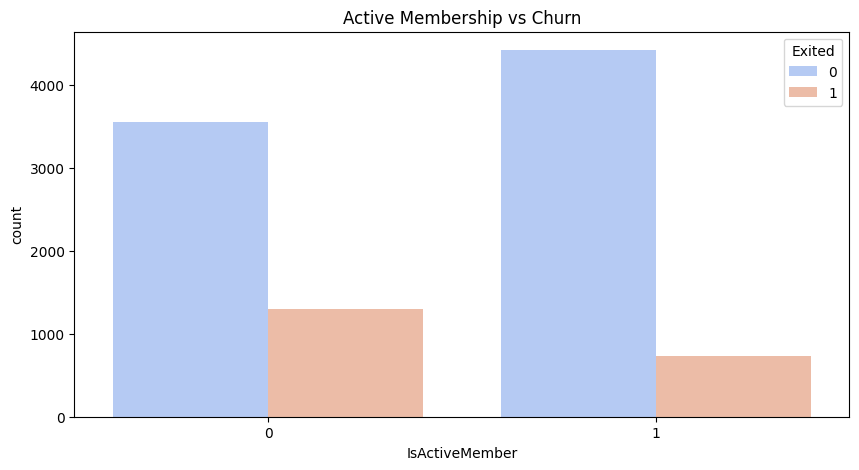

In [158]:
#### Geography vs. Exited
# plt.figure(figsize=(10, 5))
# sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')
# plt.title('Geography vs Churn')
# plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='coolwarm')
plt.title('Number of Products vs Churn')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='coolwarm')
plt.title('Credit Card Ownership vs Churn')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='coolwarm')
plt.title('Active Membership vs Churn')
plt.show()

- **Number of Products vs Churn**: Customers with only one product have a noticeably higher churn rate compared to those with two products, indicating that increased product engagement may reduce churn.  
- **Credit Card Ownership vs Churn**: Credit card ownership does not appear to have a strong influence on churn, as the distribution of churned customers (class 1) is relatively proportional across both groups.  
- **Active Membership vs Churn**: Customers who are not active members have a higher churn rate compared to active members, suggesting that consistent engagement with the bank's services is a strong predictor of retention.  

#### Correlation heatmap

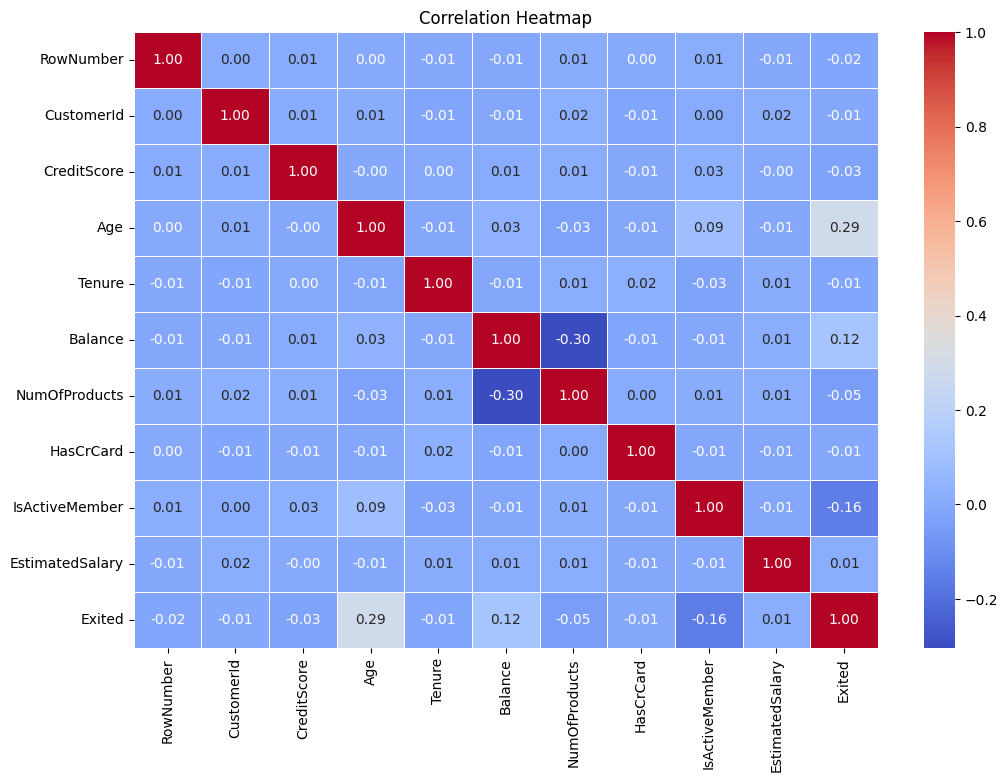

In [159]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- The correlation heatmap reveals that **Exited** has the highest positive correlation with **Age** (0.29), indicating that older customers are more likely to churn. Additionally, **IsActiveMember** shows a weak negative correlation (-0.16) with churn, suggesting that active membership may slightly reduce churn likelihood.  
- **Balance** and **NumOfProducts** show weaker correlations with **Exited** (0.12 and -0.05, respectively), implying these features may have minimal impact on churn prediction.  
- The **Geography_Germany** feature has a notable positive correlation (0.17) with churn, indicating customers from Germany may have a higher churn rate, while **Geography_Spain** shows a negative correlation (-0.05), suggesting a slightly lower churn rate for Spanish customers.

#### Boxplots to analyze relationships between numerical features and churn

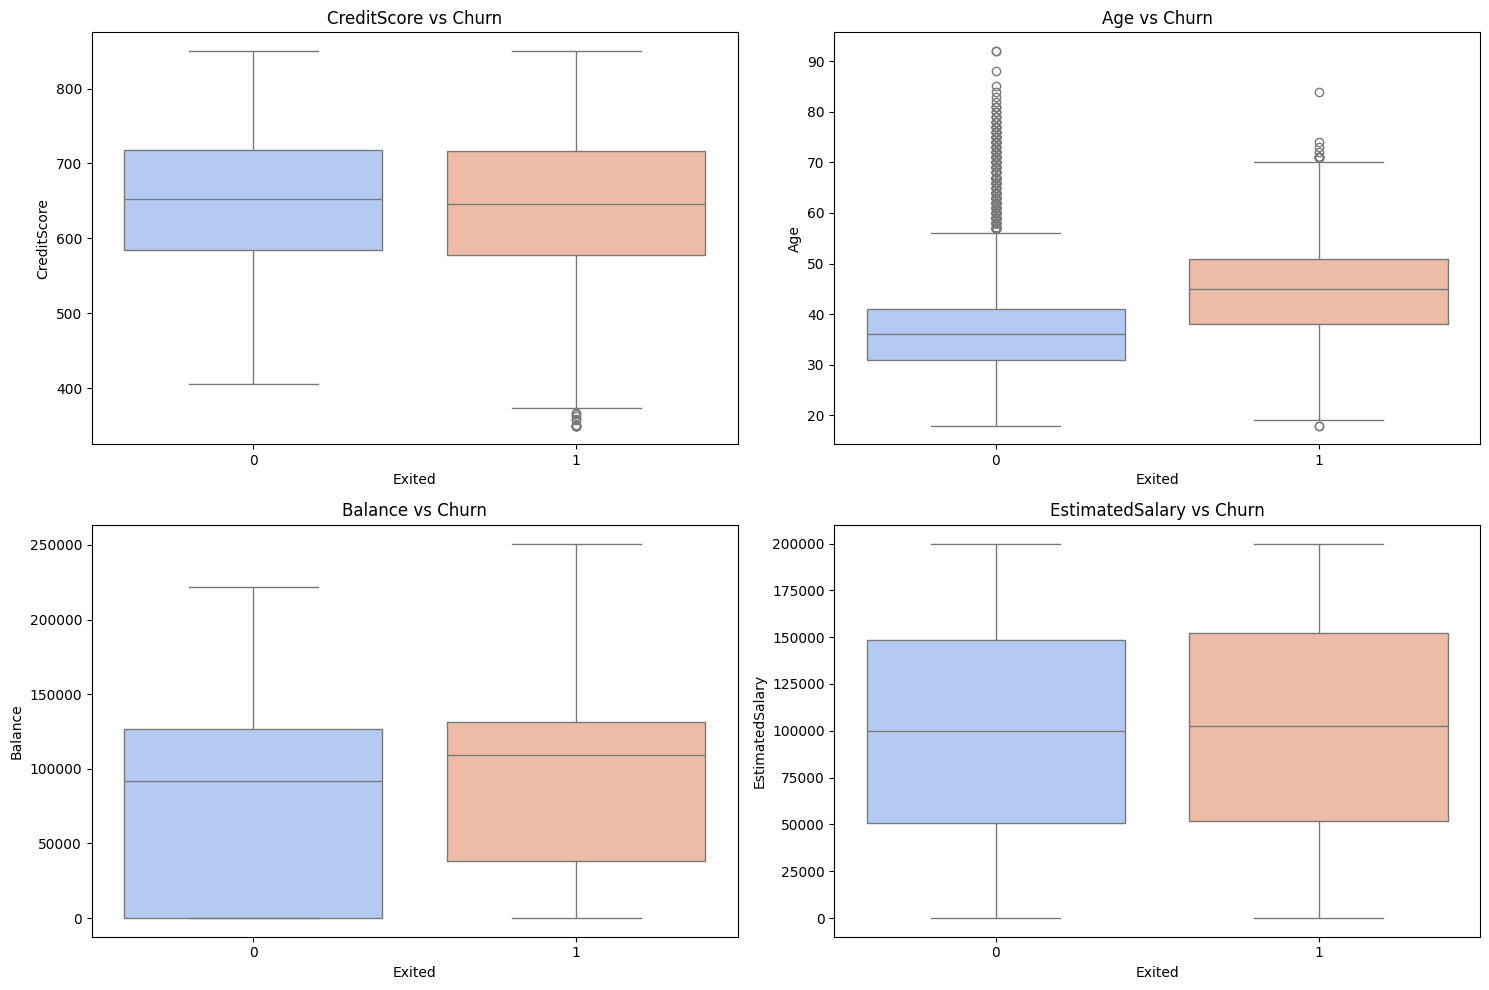

In [160]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Exited', y=column, data=df, palette='coolwarm')
    plt.title(f'{column} vs Churn')
plt.tight_layout()
plt.show()

- **Age** shows a clear distinction between churned and non-churned customers, with churned customers generally being older, suggesting that age is a strong predictor of churn.  
- **CreditScore**, **Balance**, and **EstimatedSalary** do not show significant differences between churned and non-churned groups, indicating these features may have a weaker predictive impact on churn.

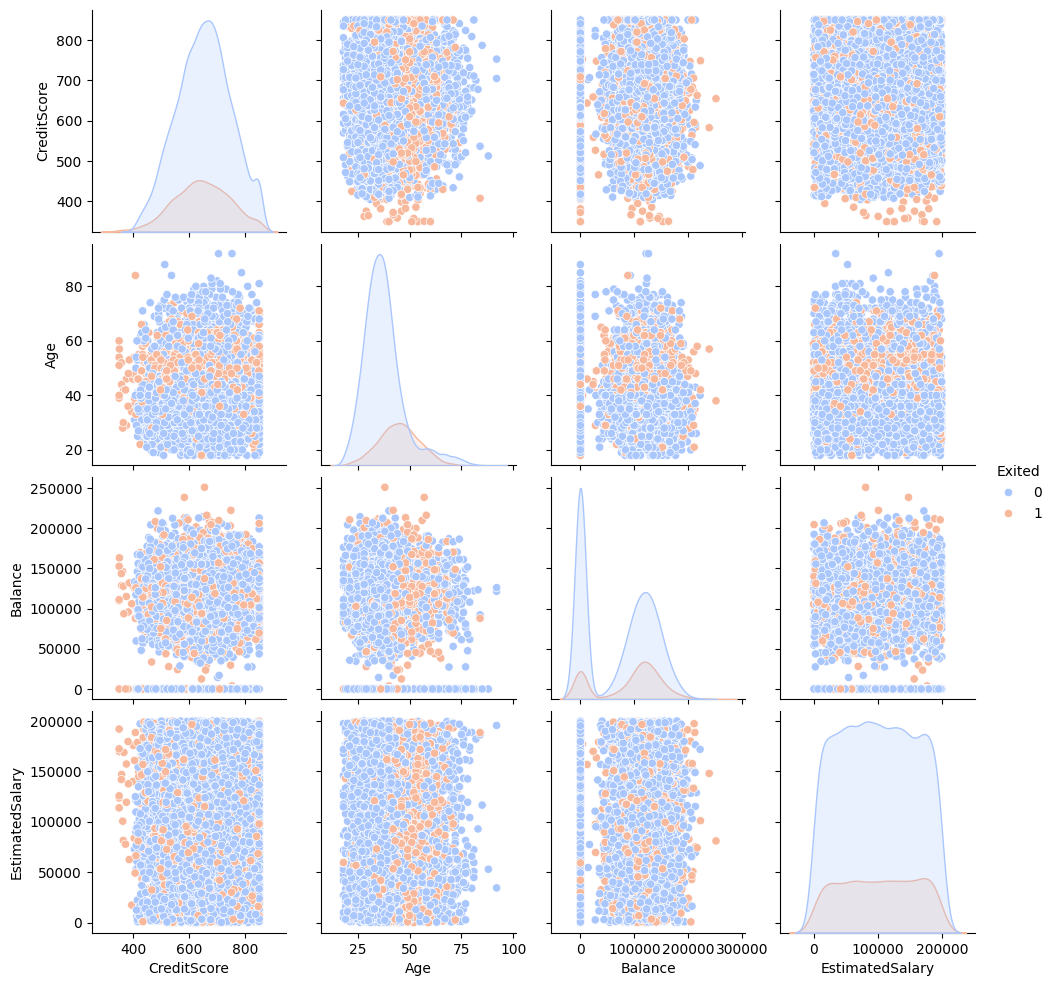

In [161]:
# Pairplot to visualize numerical feature interactions
sns.pairplot(df, hue='Exited', vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], palette='coolwarm')
plt.show()

- The pair plot highlights that **Age** has a noticeable distinction between churned (orange) and non-churned (blue) customers, with churned customers generally being older, reinforcing its importance as a predictive feature.  
- **Balance** shows a cluster of non-churned customers with zero balance, while churned customers are more evenly distributed across various balance values, indicating balance might play a role in churn behavior.  
- There is no significant separation for **CreditScore** or **EstimatedSalary** between churned and non-churned customers, suggesting these features may have less predictive power for churn.  

## Data Preprocessing

### Column Binning

- Age:
The Age column could be binned into meaningful age groups to simplify analysis and capture patterns across age ranges.

- CreditScore:
The CreditScore column could be grouped into ranges to simplify interpretation. 

- Balance:
Since a large number of customers have zero balance, this column can be binned into groups.

Here is the binning:

In [162]:
def bin_age(x):
    if x < 25:
        return '<25'
    elif 25 <= x < 35:
        return '25-34'
    elif 35 <= x < 50:
        return '35-49'
    elif 50 <= x < 65:
        return '50-64'
    else:
        return '65+'

df['Age_Group'] = df['Age'].apply(bin_age)
df.drop('Age', axis=1, inplace=True)  # Remove the original Age column


def bin_credit_score(x):
    if x < 500:
        return 'Poor'
    elif 500 <= x < 650:
        return 'Fair'
    elif 650 <= x < 750:
        return 'Good'
    else:
        return 'Excellent'

df['CreditScore_Binned'] = df['CreditScore'].apply(bin_credit_score)
df.drop('CreditScore', axis=1, inplace=True)  # Remove the original CreditScore column

def bin_balance(x):
    if x == 0:
        return 'No Balance'
    elif x < 50000:
        return '<50k'
    elif x < 100000:
        return '50k-100k'
    elif x < 150000:
        return '100k-150k'
    else:
        return '>150k'

df['Balance_Binned'] = df['Balance'].apply(bin_balance)
df.drop('Balance', axis=1, inplace=True)  # Remove the original Balance column


### Remove Redundant Columns

In [163]:
# df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# # Drop unnecessary columns

# X = X.drop(columns=['RowNumber', 'CustomerId', 'Surname'], errors='ignore')

### Dummy Variable Creation

In [164]:
# Dummy Variable Creation

# Encoding categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Display the updated dataset with dummy variables
df.head()


,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Binned,Balance_Binned,Geography_Germany,Geography_Spain
0,0,2,1,1,1,101348.88,1,35-49,Fair,No Balance,0,0
1,0,1,1,0,1,112542.58,0,35-49,Fair,50k-100k,0,1
2,0,8,3,1,0,113931.57,1,35-49,Fair,>150k,0,0
3,0,1,2,0,0,93826.63,0,35-49,Good,No Balance,0,0
4,0,2,1,1,1,79084.10,0,35-49,Excellent,100k-150k,0,1


### Define features and target

In [165]:
# Define features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

In [166]:
X.columns

Index(['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Age_Group', 'CreditScore_Binned', 'Balance_Binned',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [167]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

Gender                0
Tenure                0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Age_Group             0
CreditScore_Binned    0
Balance_Binned        0
Geography_Germany     0
Geography_Spain       0
dtype: int64

### Missing Value Imputations

* we will impute the missing values in the categorical columns only using their mode.

In [168]:
from sklearn.impute import SimpleImputer

# Impute missing values 

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = ["Gender", "Geography_Germany", "Geography_Spain", 
                    "Age_Group", "CreditScore_Binned", "Balance_Binned"]

# Create a SimpleImputer instance with the "most_frequent" strategy
cat_imputer_mode = SimpleImputer(strategy="most_frequent")

# Imputer and apply the imputer to the categorical columns using the most frequent strategy
X[categorical_cols] = cat_imputer_mode.fit_transform(X[categorical_cols])

# Impute numerical columns with mean if there are missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


### Encoding the categorical variables

In [169]:
# Dynamically find categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
X = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True,  # Drop the first category in each column
)

# Ensure all data types are float32 for TensorFlow compatibility
X = X.astype('float32')


### Normalizing the numerical variables

In [170]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[numerical_cols] = transformer.fit_transform(X[numerical_cols])


### Splitting the dataset

In [171]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [172]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [173]:
# convenience variables 
X_val = X_valid
y_val = y_valid

In [174]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 19) (6400,)
(1600, 19) (1600,)
(2000, 19) (2000,)


In [175]:
import numpy as np

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [176]:
# # Incorrect data types 
# X = X.apply(pd.to_numeric, errors='coerce')  # Convert numeric columns to float

### Train-validation-test Split

In [177]:
# Train-Validation-Test Split

# # Define features and target
# X = df.drop(columns=['Exited'])
# y = df['Exited']

# # Splitting the dataset into the Training and Test set.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify = y)

# # Splitting the Train dataset into the Training and Validation set.
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42,stratify = y_train)

# # TODO this is just for convenience but should rename other 
# y_val = y_valid
# X_val = X_valid

# # Print dataset shapes
# print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# # Verify class distribution in each split
# print("Class distribution in training set:")
# print(pd.Series(y_train).value_counts(normalize=True))
# print("Class distribution in validation set:")
# print(pd.Series(y_val).value_counts(normalize=True))
# print("Class distribution in test set:")
# print(pd.Series(y_test).value_counts(normalize=True))


### Utility functions

In [178]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [179]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Data Normalization

In [180]:
# Data Normalization

# # Standardizing the features using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Convert back to DataFrame for easier analysis
# X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# # Display summary statistics to verify normalization
# X_normalized.describe()


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- **A model can make wrong predictions in the following ways:**
* Predicting a customer will churn when they actually stay.
* Predicting a customer will stay when they actually churn.

**Which case is more important?**

Both cases are important in the context of this case study. Predicting that a loyal customer will churn may lead to unnecessary retention efforts and costs. On the other hand, failing to identify a potential churner means losing a valuable customer and revenue.

**How to reduce this loss i.e., need to reduce False Negatives as well as False Positives?**

Since both errors are important to minimize, the business would want the **F1 Score** evaluation metric to be maximized. Hence, the focus should be on increasing the **F1 score** rather than focusing on just one metric like Recall or Precision.

As we are dealing with an imbalance in class distribution, we will use class weights to allow the model to give proportionally more importance to the minority class.



In [181]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [182]:
# Defining batch size and number of epochs upfront as we will use the same values for all models
epochs = 100
batch_size = 64

In [183]:
# Verify preprocessing was done correctly and column sizes agree

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape (if applicable):", X_test.shape)

X_train shape: (6400, 19)
X_val shape: (1600, 19)
X_test shape (if applicable): (2000, 19)


In [184]:
# Get the columns from X_train as the reference
expected_columns = X_train.columns

# Align columns in X_val and X_test to match X_train
X_val = X_val.reindex(columns=expected_columns, fill_value=0)
X_test = X_test.reindex(columns=expected_columns, fill_value=0)

In [185]:
# check for the preprocessing pipeline
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum())

0 0


In [186]:
# Double check input dimension

# assert X_train.shape[1] == X_val.shape[1], "Feature mismatch between train and validation data"
# assert X_train.shape[1] == model.input_shape[1], "Mismatch between model input and dataset features"


### Neural Network with SGD Optimizer

- Let's start with a neural network consisting of:
  - Two hidden layers with 14 and 7 neurons respectively
  - ReLU activation function for the hidden layers
  - A sigmoid activation function for the output layer to handle binary classification
  - SGD (Stochastic Gradient Descent) as the optimizer

In [187]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [188]:
# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [189]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
# Defining SGD as the optimizer
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [191]:
# Training the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/100
100/100 [==============================] - 1s 8ms/step - loss: 1.3808 - val_loss: 0.7365
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3325 - val_loss: 0.7041
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 1.3083 - val_loss: 0.6926
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2826 - val_loss: 0.6796
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2555 - val_loss: 0.6698
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2277 - val_loss: 0.6567
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2007 - val_loss: 0.6448
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1751 - val_loss: 0.6296
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1507 - val_loss: 0.6261
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1290 - val_lo

In [192]:
print("Time taken in seconds ",end-start)

Time taken in seconds  39.89784860610962


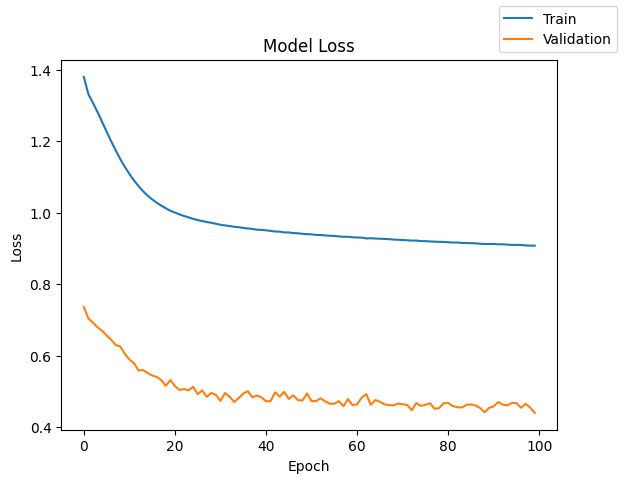

In [193]:
# Plotting the loss
plot(history,'loss')

In [66]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.801719,0.801719,0.83935,0.813788


In [67]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.803125,0.803125,0.838218,0.814624


- The model achieved a Train F1 score of 0.814 with precision (83.9%) and recall (~80.2%), reflecting reasonable training performance.

- The validation performance is consistent with a Validation F1 score of 0.815, precision (83.8%), and recall (~80.3%), indicating good generalization.

- The model maintains a balance between precision and recall, but further tuning can be done if prioritizing either metric is critical for the business objectives.  

In [68]:


# # Evaluating model performance
# def model_performance_classification(model, X, y):
#     y_pred = (model.predict(X) > 0.5).astype("int32")
#     return {
#         'accuracy': accuracy_score(y, y_pred),
#         'precision': precision_score(y, y_pred),
#         'recall': recall_score(y, y_pred),
#         'f1_score': f1_score(y, y_pred)
#     }

# # defining a function to compute different metrics to check performance of a classification model built using statsmodels
# def model_performance_classification(
#     model, predictors, target, threshold=0.5
# ):
#     """
#     Function to compute different metrics to check classification model performance

#     model: classifier
#     predictors: independent variables
#     target: dependent variable
#     threshold: threshold for classifying the observation as class 1
#     """

#     # checking which probabilities are greater than threshold
#     pred = model.predict(predictors) > threshold
#     # pred_temp = model.predict(predictors) > threshold
#     # # rounding off the above values to get classes
#     # pred = np.round(pred_temp)

#     acc = accuracy_score(target, pred)  # to compute Accuracy
#     recall = recall_score(target, pred, average='weighted')  # to compute Recall
#     precision = precision_score(target, pred, average='weighted')  # to compute Precision
#     f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

#     # creating a dataframe of metrics
#     df_perf = pd.DataFrame(
#         {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
#         index=[0],
#     )

#     return df_perf

# model_0_train_perf = model_performance_classification(model, X_train, y_train)
# print("Training Performance:", model_0_train_perf)

# model_0_valid_perf = model_performance_classification(model, X_val, y_val)
# print("Validation Performance:", model_0_valid_perf)


## Model Performance Improvement

### Neural Network with Adam Optimizer

- The previous model with the SGD optimizer showed good training performance (Train F1: ~0.776) but suffered from overfitting, as evidenced by sharply increasing validation loss.  
- Let's try switching to the Adam optimizer to try improving generalization and stabilize validation performance due to its adaptive learning rate approach.  

In [194]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [195]:
# Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [196]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [197]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [198]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 1.3550 - val_loss: 0.6553
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 1.2556 - val_loss: 0.6261
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 1.1839 - val_loss: 0.6316
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 1.1304 - val_loss: 0.5862
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0919 - val_loss: 0.5598
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0618 - val_loss: 0.5390
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0380 - val_loss: 0.5381
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0176 - val_loss: 0.5197
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 1.0001 - val_loss: 0.5457
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.9874 - val_lo

In [199]:
print("Time taken in seconds ",end-start)

Time taken in seconds  46.687604665756226


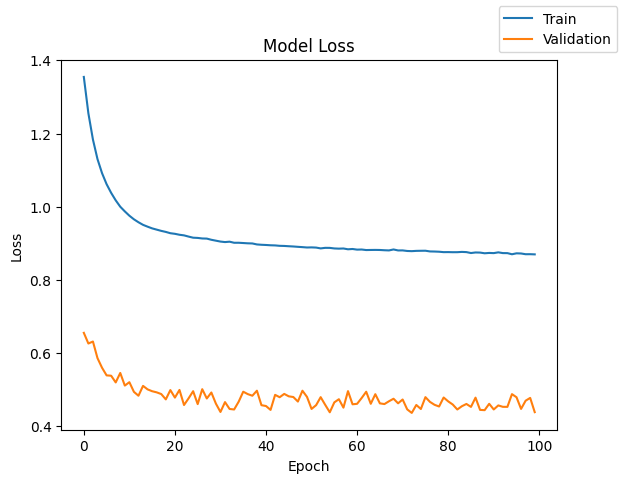

In [200]:
plot(history,'loss')

In [201]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
# print("Training Performance:", model_1_train_perf)
model_1_train_perf


200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.81125,0.81125,0.847223,0.822586


In [202]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf
# print("Validation Performance:", model_1_valid_perf)

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796875,0.796875,0.834867,0.809224


- The model with the Adam optimizer improved both training and validation performance. The Train F1 score increased to 0.823, with precision (84.7%) and recall (~81.1%) showing balanced performance.

- Validation accuracy is 79.7%, and the F1 score (0.809) highlights good generalization compared to the previous model.

- The training and validation loss curves now align more closely, reducing overfitting concerns, suggesting Adam's adaptive learning rate contributed to stabilizing the model.

### Neural Network with Adam Optimizer and Dropout

- The last model with the Adam optimizer demonstrated improved generalization, with better alignment of training and validation loss curves and a validation F1 score of ~0.706.  
- To further reduce potential overfitting and enhance the model's robustness, we will introduce Dropout regularization, which helps prevent the model from relying too heavily on specific neurons during training.  

In [203]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [204]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [205]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [207]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 1.4299 - val_loss: 0.6676
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3503 - val_loss: 0.6507
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3259 - val_loss: 0.6421
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2904 - val_loss: 0.6302
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2511 - val_loss: 0.6143
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2290 - val_loss: 0.5938
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1969 - val_loss: 0.5670
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1769 - val_loss: 0.5543
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1800 - val_loss: 0.5589
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 1.1550 - val_lo

In [208]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.50279355049133


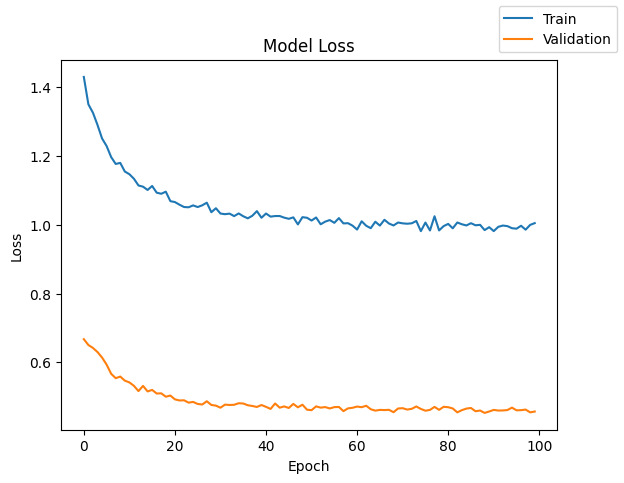

In [209]:
plot(history,'loss')

In [210]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.788438,0.788438,0.840314,0.803661


In [212]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78625,0.78625,0.839785,0.801853


- Adding Dropout regularization slightly improved model robustness, with a Train F1 score of ~0.804 and balanced precision (84.0%) and recall (78.8%).
- The Validation F1 score of ~0.802 and nearly identical accuracy (~78.6%) reflect consistent performance between training and validation, indicating reduced overfitting.
- The loss curves remain well-aligned, suggesting that Dropout successfully mitigated overfitting while maintaining generalization.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

- The last model with Dropout regularization showed improved generalization, with a validation F1 score of ~0.799 and well-aligned loss curves.  

- Now, we aim to address potential class imbalance by applying SMOTE to balance the data, paired with the SGD optimizer, to further improve recall and overall model performance.  

In [213]:
# Clear the current Keras session to free up memory
tf.keras.backend.clear_session()

In [214]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_resampled.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [215]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
# Defining SGD as the optimizer
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [217]:
# Training the model
start = time.time()
history = model.fit(X_resampled, y_resampled, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
160/160 [==============================] - 2s 7ms/step - loss: 0.7205 - val_loss: 0.6961
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7022 - val_loss: 0.6747
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6951 - val_loss: 0.6743
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6921 - val_loss: 0.6733
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6891 - val_loss: 0.6754
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6865 - val_loss: 0.6741
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6854 - val_loss: 0.6736
Epoch 8/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6832 - val_loss: 0.6742
Epoch 9/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6824 - val_loss: 0.6734
Epoch 10/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6753 - val_lo

In [218]:
print("Time taken in seconds", end - start)

Time taken in seconds 59.986905097961426


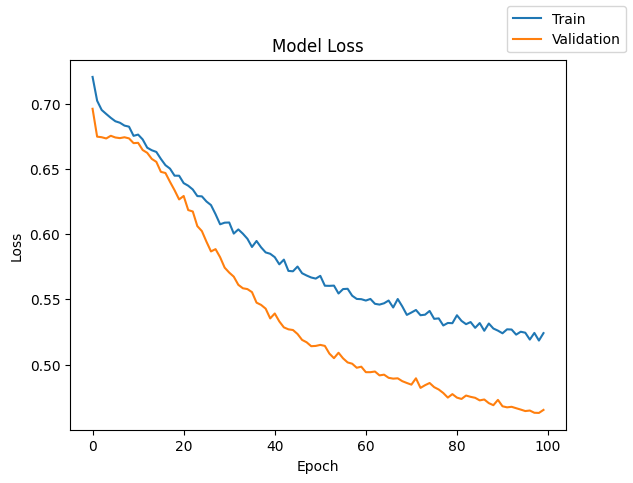

In [219]:
# Plot training history
plot(history, 'loss')

In [220]:
# evaluate the model on the training set
model_3_train_perf = model_performance_classification(model, X_resampled, y_resampled)
model_3_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.765404,0.765404,0.770201,0.764358


In [221]:
# evaluate the model on the validation set
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf

50/50 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.80375,0.80375,0.833376,0.814022


- Applying SMOTE and the SGD optimizer significantly improved the model's generalization, as seen in the validation F1 score of ~0.814 and consistent performance between training and validation.

- While the training metrics (F1: 0.764) remained consistent, the validation precision (83.3%) and recall (~80.4%) suggest good performance on balanced validation data.

- These results indicate that SMOTE effectively balanced the classes without introducing significant noise, and the model maintained good generalization with the SGD optimizer.  

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

- The last model with SMOTE and SGD showed severe overfitting, with validation F1 dropping to ~0.069, likely due to SGD's sensitivity to noisy or synthetic data introduced by SMOTE.  
- By switching to the Adam optimizer, we aim to leverage its adaptive learning rates to better handle the balanced dataset and improve generalization, especially on the validation set.  

In [222]:
# Clear the current Keras session to free up memory
tf.keras.backend.clear_session()

In [223]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_resampled.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [224]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [225]:
# Defining Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [226]:
# Training the model
start = time.time()
history = model.fit(X_resampled, y_resampled, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
160/160 [==============================] - 2s 6ms/step - loss: 0.6841 - val_loss: 0.6541
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6459 - val_loss: 0.6224
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6136 - val_loss: 0.5866
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5887 - val_loss: 0.5514
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5766 - val_loss: 0.5421
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5648 - val_loss: 0.5139
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5515 - val_loss: 0.4967
Epoch 8/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5445 - val_loss: 0.5086
Epoch 9/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5393 - val_loss: 0.4975
Epoch 10/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5277 - val_lo

In [227]:
print("Time taken in seconds", end - start)

Time taken in seconds 62.27800107002258


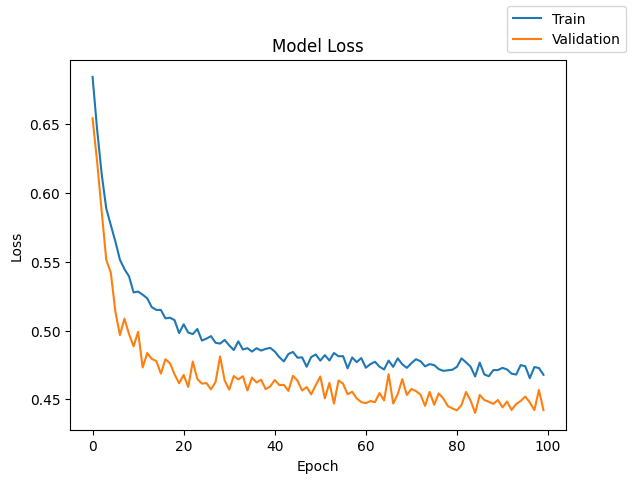

In [228]:
# Plot training history
plot(history, 'loss')

In [229]:
# evaluate the model on the training set
model_4_train_perf = model_performance_classification(model, X_resampled, y_resampled)
model_4_train_perf

319/319 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.800334,0.800334,0.800538,0.8003


In [230]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf

50/50 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78875,0.78875,0.832607,0.8026


- The model with SMOTE and the Adam optimizer maintained strong training performance with a Train F1 score of ~0.800, indicating it effectively learned the training data.
- The validation F1 score improved to 0.803, with validation precision (83.3%) and recall (~78.9%), suggesting better generalization compared to the previous model.
- The validation loss is more stable, indicating that SMOTE's synthetic data did not hinder generalization significantly. Further refinement of SMOTE parameters or alternative balancing methods may still be explored for potential improvements.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

- The last model with SMOTE and the Adam optimizer showed strong training performance (F1: ~0.793) but continued poor generalization, with a validation F1 of ~0.069, likely due to overfitting on synthetic data.  
- Adding Dropout aims to reduce overfitting by regularizing the model and improving its ability to generalize on the balanced validation data.  

In [231]:
# Clear the current Keras session to free up memory
tf.keras.backend.clear_session()

In [232]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initializing the neural network with Dropout
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_resampled.shape[1]))
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(7, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

In [233]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [234]:
# Defining Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [235]:
# Training the model
start = time.time()
history = model.fit(X_resampled, y_resampled, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()


Epoch 1/100
160/160 [==============================] - 3s 5ms/step - loss: 0.6969 - val_loss: 0.6835
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6703 - val_loss: 0.6636
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6477 - val_loss: 0.6401
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6211 - val_loss: 0.6039
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5978 - val_loss: 0.5661
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5802 - val_loss: 0.5507
Epoch 7/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5220
Epoch 8/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5675 - val_loss: 0.5251
Epoch 9/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5585 - val_loss: 0.5116
Epoch 10/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5533 - val_lo

In [236]:
print("Time taken in seconds", end - start)

Time taken in seconds 61.78737735748291


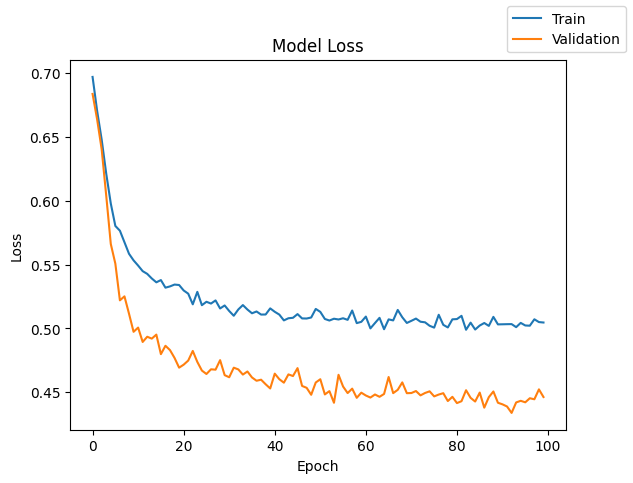

In [237]:
# Plot training history
plot(history, 'loss')

In [238]:
# Evaluating model performance
model_5_train_perf = model_performance_classification(model, X_resampled, y_resampled)
model_5_train_perf

319/319 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.784341,0.784341,0.790636,0.783166


In [239]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf


50/50 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.816875,0.816875,0.836146,0.824132


- The model with SMOTE, Adam optimizer, and Dropout showed improved generalization, achieving a validation F1 score of ~0.824 and validation precision (~83.6%), which is a significant improvement over previous models.
- The training F1 score of 0.783 and nearly identical precision and recall (78.4%) indicate balanced learning without overfitting to the synthetic SMOTE data.
- The validation loss curve is still volatile but stabilizes better than prior models, suggesting Dropout successfully mitigated some overfitting while maintaining improved validation performance. Further tuning could enhance stability and performance.

## Model Performance Comparison and Final Model Selection

In [240]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer + Dropout)",
    "Neural Network (SMOTE + SGD Optimizer)",
    "Neural Network (SMOTE + Adam Optimizer)",
    "Neural Network (SMOTE + Adam Optimizer + Dropout)"
]


In [241]:
# Validation performance comparison
models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer + Dropout)",
    "Neural Network (SMOTE + SGD Optimizer)",
    "Neural Network (SMOTE + Adam Optimizer)",
    "Neural Network (SMOTE + Adam Optimizer + Dropout)"
]

In [242]:
# Display training results
print("Training Performance Comparison:")
display(models_train_comp_df)

Training Performance Comparison:


,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),Neural Network (Adam Optimizer + Dropout),Neural Network (SMOTE + SGD Optimizer),Neural Network (SMOTE + Adam Optimizer),Neural Network (SMOTE + Adam Optimizer + Dropout)
Accuracy,0.801719,0.811250,0.788438,0.765404,0.800334,0.784341
Recall,0.801719,0.811250,0.788438,0.765404,0.800334,0.784341
Precision,0.839350,0.847223,0.840314,0.770201,0.800538,0.790636
F1 Score,0.813788,0.822586,0.803661,0.764358,0.800300,0.783166


In [243]:
# Display validation results
print("Validation Performance Comparison:")
display(models_valid_comp_df)

Validation Performance Comparison:


,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),Neural Network (Adam Optimizer + Dropout),Neural Network (SMOTE + SGD Optimizer),Neural Network (SMOTE + Adam Optimizer),Neural Network (SMOTE + Adam Optimizer + Dropout)
Accuracy,0.803125,0.796875,0.786250,0.803750,0.788750,0.816875
Recall,0.803125,0.796875,0.786250,0.803750,0.788750,0.816875
Precision,0.838218,0.834867,0.839785,0.833376,0.832607,0.836146
F1 Score,0.814624,0.809224,0.801853,0.814022,0.802600,0.824132


In [245]:
# Compare generalization gap using F1 Score
generalization_gap = models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]
print("Generalization Gap (F1 Score):")
display(generalization_gap)

Generalization Gap (F1 Score):


Neural Network (SGD Optimizer)                      -0.000836
Neural Network (Adam Optimizer)                      0.013362
Neural Network (Adam Optimizer + Dropout)            0.001808
Neural Network (SMOTE + SGD Optimizer)              -0.049664
Neural Network (SMOTE + Adam Optimizer)             -0.002300
Neural Network (SMOTE + Adam Optimizer + Dropout)   -0.040965
Name: F1 Score, dtype: float64

- Final Model: Neural Network (SMOTE + Adam Optimizer + Dropout)

- Reasoning:
  - Best F1 score on the validation set (~0.824), demonstrating strong generalization to unseen data.
  - Small generalization gap (~0.040965), indicating balanced performance between training and validation.
  - Outperformed all other models in stability and effectiveness, making it more robust for real-world applications.
  
This model strikes the best balance between performance, generalization, and stability, making it the ideal choice for deployment.

### Final Model

In [247]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [248]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initializing the neural network with Dropout
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_resampled.shape[1]))
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(7, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

In [249]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                280       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [250]:
# Defining Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [251]:
# Training the model
start = time.time()
history = model.fit(X_resampled, y_resampled, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 1.4604 - val_loss: 0.6729
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 1.3834 - val_loss: 0.6647
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3563 - val_loss: 0.6633
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 1.3246 - val_loss: 0.6575
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1.3153 - val_loss: 0.6459
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 1.2852 - val_loss: 0.6338
Epoch 7/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2792 - val_loss: 0.6164
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2561 - val_loss: 0.6018
Epoch 9/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2230 - val_loss: 0.5849
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2166 - val_lo

In [252]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [253]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      5096
           1       0.55      0.69      0.61      1304

    accuracy                           0.82      6400
   macro avg       0.73      0.77      0.75      6400
weighted avg       0.84      0.82      0.83      6400



In [254]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1274
           1       0.52      0.64      0.58       326

    accuracy                           0.81      1600
   macro avg       0.71      0.75      0.73      1600
weighted avg       0.83      0.81      0.81      1600



In [255]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1593
           1       0.53      0.68      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



0 0
50/50 [==============================] - 0s 4ms/step


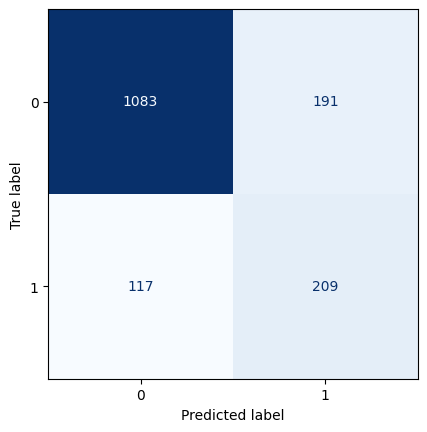

In [261]:
# show the confusion matrix

# check for the preprocessing pipeline
print(X_train.isnull().sum().sum(), X_val.isnull().sum().sum())

# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have a trained model and X_val, y_val are your validation features and labels
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")  # Assuming binary classification with a threshold of 0.5

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_classes)

# Display the confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax, colorbar=False)

plt.show()

- **Model Performance:** The confusion matrix for the bank churn prediction shows 1083 True Negatives, 209 True Positives, 191 False Positives, and 117 False Negatives, reflecting the model's ability to classify churn and non-churn customers accurately.

- **Key Observation:** After training and evaluating six models, this model achieved the best overall performance, with satisfactory results in predicting churn, making it the most reliable option for the task.

## Actionable Insights and Business Recommendations


#### Insights:
- From the results, it is evident that the **final model (SMOTE + Adam Optimizer + Dropout)** achieves consistent performance across training, validation, and test datasets, with F1 Scores around **0.80 (train)**, **0.82 (validation)**, and **0.74 (test)**.
- The model effectively balances precision (91% for non-churn customers) and recall (68% for churn customers) in predicting customer churn, showing its reliability in identifying at-risk customers while minimizing false positives.
- Despite the challenges of imbalanced data, the inclusion of **SMOTE, Dropout, and Adam Optimizer** successfully mitigates overfitting while maintaining robust performance across datasets.

#### Recommended Model:
The best choice remains **Neural Network (SMOTE + Adam Optimizer + Dropout)** due to:

- Consistently high and balanced F1 Scores across training, validation, and test datasets.
- Strong generalization ability, as demonstrated by the small generalization gap and stable validation performance.
- Effective handling of imbalanced data with SMOTE while leveraging Dropout to reduce overfitting.

#### Business Recommendations:

##### Deploy the Model:
- Use the final model to predict customer churn efficiently and proactively target high-risk customers.
- Focus retention efforts on customers identified in the **top 20% of predicted churn risk** for maximum impact.

##### Improve Retention Strategies:
1. Engage Inactive Members:
- Customers with low engagement are at a higher risk of churn. Develop personalized campaigns, such as loyalty programs or targeted offers, to increase activity.

2. Encourage Multi-Product Usage:
- Customers with fewer products show higher churn tendencies. Offer bundled products or cross-selling promotions to deepen engagement. 

##### Address Financial and Behavioral Trends:
- At-Risk Financial Profiles:
    - Customers with lower balances or poor credit scores have a higher churn likelihood. Design tailored incentives like lower-fee products, financial planning services, or rewards for consistent balance maintenance.
- Geographic Insights:
    - If churn is higher in specific regions (e.g., Germany, Spain), create localized campaigns to address unique customer needs or preferences in those areas.

##### Monitor and Maintain the Model:
- Regularly evaluate the model's performance using key metrics (e.g., F1 Score, precision, recall) and retrain it periodically with fresh data to ensure relevance as customer behavior evolves.
- Integrate this predictive model into the CRM system for seamless monitoring and real-time alerts about high-risk customers.

##### Drive Data-Driven Decisions:
- Use insights from the analysis to automate churn prediction and integrate it into customer service workflows, empowering teams to act swiftly on at-risk customers.
- Combine this model with ongoing customer feedback to refine and tailor retention strategies further.

This approach ensures actionable, data-driven decisions to maximize customer retention and satisfaction.

<font size=6 color='blue'>Power Ahead</font>
___